In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer


<span style="color: yellow;">Let's load the cleaned and labeled csv file.
</span>

In [2]:
# Save the DataFrame to a CSV file
data_cleaned= pd.read_csv(r'C:\Users\sandi\Desktop\data_cleaned.csv')

data_cleaned.head(20)

,Phone Number,Message,Received,Spam
0,7016308537,Received,"Dear Customer, You have 0000 missed calls from...",0
1,7738260402,Received,"Dear Customer, You have a missed call from +00...",0
2,7738260402,Received,"Dear Customer, +0000 is now available to take ...",0
3,8037805031,Received,"Dear Customer, You have a missed call from +00...",0
4,9512606460,Received,"Dear Customer, You have a missed call from +00...",0
5,57273200,Received,<#> 0000 is your Facebook code Laz+nxCarLW,0
6,57575022,Received,Amazon: 0000,0
7,57575022,Received,https://amazon.in/a/c/r/Ip0000zP0000RSAEP0000G...,0
8,57575022,Received,0000 Amazon OTP,0
9,57575701,Received,Xiaomi Account verification code: 0000. Don''t...,0


In [3]:
data_cleaned.shape

(2627, 4)


<span style="color: yellow;"> Let's remove all the punctuation, speacial characters and convert all texts to lower case.
</span>

In [4]:
import re
import string

def preprocess_text(text):
    # Replace special characters and punctuation with a blank space
    pattern_special_chars = r'[^\w\s]'
    text = re.sub(pattern_special_chars, ' ', text)
    
    # Convert the text to lowercase
    text = text.lower()
    
    return text

data_cleaned['Received'] = data_cleaned['Received'].apply(preprocess_text)


data_cleaned.head(20)

,Phone Number,Message,Received,Spam
0,7016308537,Received,dear customer you have 0000 missed calls from...,0
1,7738260402,Received,dear customer you have a missed call from 00...,0
2,7738260402,Received,dear customer 0000 is now available to take ...,0
3,8037805031,Received,dear customer you have a missed call from 00...,0
4,9512606460,Received,dear customer you have a missed call from 00...,0
5,57273200,Received,0000 is your facebook code laz nxcarlw,0
6,57575022,Received,amazon 0000,0
7,57575022,Received,https amazon in a c r ip0000zp0000rsaep0000g...,0
8,57575022,Received,0000 amazon otp,0
9,57575701,Received,xiaomi account verification code 0000 don t...,0


In [5]:
data_cleaned.shape

(2627, 4)

In [6]:
data_cleaned.isnull().mean()*100

Phone Number    0.0
Message         0.0
Received        0.0
Spam            0.0
dtype: float64


<span style="color: yellow;"> Let's check if there is any row containing less than 15 characters and if they make any sense.
</span>

In [7]:
data_cleaned[data_cleaned['Received'].str.len()<15]

,Phone Number,Message,Received,Spam
296,917588000000,Received,eod,0
2600,VM-ViCARE,Received,,1


In [8]:
data_cleaned= data_cleaned[data_cleaned['Received'].str.len()>15]

data_cleaned.head(20)

,Phone Number,Message,Received,Spam
0,7016308537,Received,dear customer you have 0000 missed calls from...,0
1,7738260402,Received,dear customer you have a missed call from 00...,0
2,7738260402,Received,dear customer 0000 is now available to take ...,0
3,8037805031,Received,dear customer you have a missed call from 00...,0
4,9512606460,Received,dear customer you have a missed call from 00...,0
5,57273200,Received,0000 is your facebook code laz nxcarlw,0
6,57575022,Received,amazon 0000,0
7,57575022,Received,https amazon in a c r ip0000zp0000rsaep0000g...,0
8,57575022,Received,0000 amazon otp,0
9,57575701,Received,xiaomi account verification code 0000 don t...,0


In [9]:
data_cleaned.shape

(2625, 4)

<span style="color: yellow;"> There is no use of the column named 'Message' and 'Phone Number' so let's remove it.
</span>

In [10]:
data_cleaned= data_cleaned.drop(['Message', 'Phone Number'], axis=1)

data_cleaned.head(20)

,Received,Spam
0,dear customer you have 0000 missed calls from...,0
1,dear customer you have a missed call from 00...,0
2,dear customer 0000 is now available to take ...,0
3,dear customer you have a missed call from 00...,0
4,dear customer you have a missed call from 00...,0
5,0000 is your facebook code laz nxcarlw,0
6,amazon 0000,0
7,https amazon in a c r ip0000zp0000rsaep0000g...,0
8,0000 amazon otp,0
9,xiaomi account verification code 0000 don t...,0


In [11]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2625 entries, 0 to 2626
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Received  2625 non-null   object
 1   Spam      2625 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 61.5+ KB


<span style="color: yellow;"> Let's check balance of the dataset.
</span>

In [12]:
balance_report= (data_cleaned['Spam'].value_counts()/ len(data_cleaned['Spam']))*100

balance_report

Spam
1    52.685714
0    47.314286
Name: count, dtype: float64

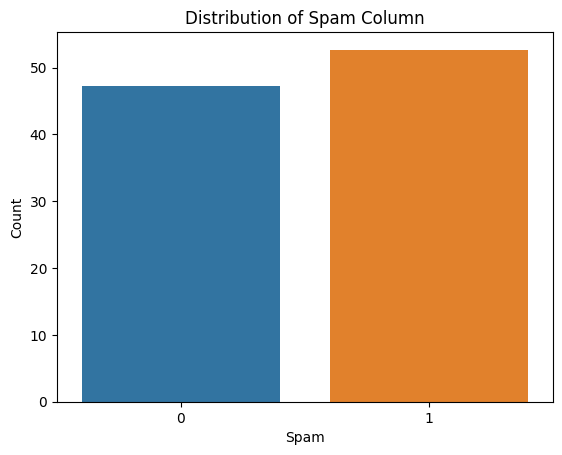

In [13]:

sns.barplot(x=balance_report.index, y=balance_report)
plt.xlabel('Spam')
plt.ylabel('Count')
plt.title('Distribution of Spam Column')
plt.show()


The dataset looks almost balanced so no need to apply SMOTE

<span style="color: yellow;"> Let's split the daatset into 'train', 'cv' and 'test' part.
</span>

In [14]:
from sklearn.model_selection import train_test_split

X = data_cleaned['Received']
y = data_cleaned['Spam']
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape

(1837,)

In [16]:
y_train.shape

(1837,)

In [17]:
X_cv.shape

(788,)

In [18]:
y_cv.shape

(788,)

In [19]:
X = X_cv
y = y_cv
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [20]:
X_cv.shape

(394,)

In [21]:
y_cv.shape

(394,)

In [22]:
X_test.shape

(394,)

In [23]:
y_test.shape

(394,)

<span style="color: yellow;"> Let's vectorize the 'Received' column.
</span>

In [24]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_features = vectorizer.fit_transform(X_train)
X_cv_features = vectorizer.transform(X_cv)
X_test_features = vectorizer.transform(X_test)

In [25]:
X_train_features

<1837x4803 sparse matrix of type '<class 'numpy.float64'>'
	with 29217 stored elements in Compressed Sparse Row format>

X_train_features is a sparse matrix with 1837 rows and 4983 features/ columns.

In [26]:
X_cv_features

<394x4803 sparse matrix of type '<class 'numpy.float64'>'
	with 5858 stored elements in Compressed Sparse Row format>

In [27]:
X_test_features

<394x4803 sparse matrix of type '<class 'numpy.float64'>'
	with 5652 stored elements in Compressed Sparse Row format>

Similarly, X_cv_features and X_test_features are sparse matrices with 394 rows and 2175 features/ columns.

In [28]:
X_train_features_df = pd.DataFrame(X_train_features.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate features and target labels into a single DataFrame
train_data = pd.concat([X_train_features_df, y_train], axis=1)

train_data.head(20)

,0000,0000_0000,0000a,0000a0000cbfe,0000a0000de0000a0000f0000aa0000bb0000f0000caaa0000,0000a0000g,0000a0000lw,0000a0000yh0000,0000ab0000b0000c0000d,0000acres,...,zonal,zone,zoya,ztldjt0000,ztloht,ztv0000j0000,zx0000,zzd0000,zzlgzpo,Spam
0,0.054750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.061129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.061849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.185935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.136697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.292186,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.191773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.303019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.140270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [29]:
X_cv_features_df = pd.DataFrame(X_cv_features.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate features and target labels into a single DataFrame
cv_data = pd.concat([X_cv_features_df, y_cv], axis=1)

cv_data.head(20)

,0000,0000_0000,0000a,0000a0000cbfe,0000a0000de0000a0000f0000aa0000bb0000f0000caaa0000,0000a0000g,0000a0000lw,0000a0000yh0000,0000ab0000b0000c0000d,0000acres,...,zonal,zone,zoya,ztldjt0000,ztloht,ztv0000j0000,zx0000,zzd0000,zzlgzpo,Spam
0,0.063245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.651151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.066031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,0.347219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,0.058667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.135958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [30]:
X_test_features_df = pd.DataFrame(X_test_features.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate features and target labels into a single DataFrame
cv_data = pd.concat([X_cv_features_df, y_cv], axis=1)

cv_data.head(20)

,0000,0000_0000,0000a,0000a0000cbfe,0000a0000de0000a0000f0000aa0000bb0000f0000caaa0000,0000a0000g,0000a0000lw,0000a0000yh0000,0000ab0000b0000c0000d,0000acres,...,zonal,zone,zoya,ztldjt0000,ztloht,ztv0000j0000,zx0000,zzd0000,zzlgzpo,Spam
0,0.063245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.651151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.066031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,0.347219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,0.058667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.135958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


<span style="color: yellow;"> Let's train few models.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize the logistic regression model
model_lr = LogisticRegression(penalty='l2', tol=0.0001, random_state=43, max_iter=10000, 
                           multi_class='auto', verbose=0, n_jobs=-1)

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}
f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, scoring=f1_scorer, refit=True)
grid_search.fit(X_train_features, y_train)

best_model_lr = grid_search.best_estimator_
y_pred = best_model_lr.predict(X_cv_features)

accuracy = accuracy_score(y_cv, y_pred)
f1 = f1_score(y_cv, y_pred)

# Print accuracy and F1 score
print("Accuracy:", round(accuracy,2))
print("F1 Score:", round(f1,2))

report = classification_report(y_cv, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Classification Report:")
print(report)

c:\Users\sandi\anaconda3\envs\py311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
c:\Users\sandi\anaconda3\envs\py311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
c:\Users\sandi\anaconda3\envs\py311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
c:\Users\sandi\anaconda3\envs\py311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
c:\Users\sandi\anaconda3\envs\py311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not

Accuracy: 0.95
F1 Score: 0.95
Best Hyperparameters: {'C': 100, 'solver': 'saga'}
Best F1 Score: 0.9414195534993957
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       198
           1       0.94      0.96      0.95       196

    accuracy                           0.95       394
   macro avg       0.95      0.95      0.95       394
weighted avg       0.95      0.95      0.95       394



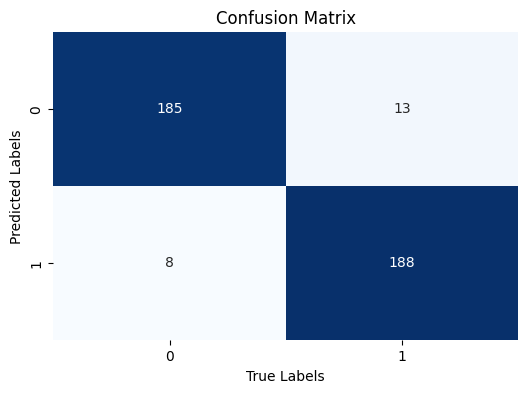

In [55]:

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_cv, y_pred)

# Heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True Labels')       
plt.ylabel('Predicted Labels')  
plt.title('Confusion Matrix')
plt.show()


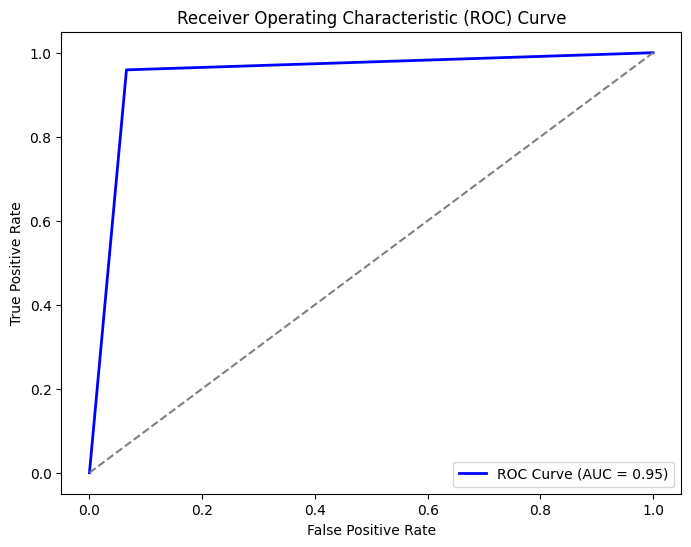

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_cv, y_pred)
roc_auc = roc_auc_score(y_cv, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, make_scorer, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize the SVM model
model_svc = SVC(verbose=0, random_state=43)

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel':['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}
f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=model_svc, param_grid=param_grid, cv=5, scoring=f1_scorer, refit=True)
grid_search.fit(X_train_features, y_train)

best_model_svc = grid_search.best_estimator_
y_pred = best_model_svc.predict(X_cv_features)

accuracy = accuracy_score(y_cv, y_pred)
f1 = f1_score(y_cv, y_pred)

# Print accuracy and F1 score
print("Accuracy:", round(accuracy,2))
print("F1 Score:", round(f1,2))

report = classification_report(y_cv, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Classification Report:")
print(report)

Accuracy: 0.94
F1 Score: 0.94
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best F1 Score: 0.9378266255238247
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       198
           1       0.92      0.96      0.94       196

    accuracy                           0.94       394
   macro avg       0.94      0.94      0.94       394
weighted avg       0.94      0.94      0.94       394



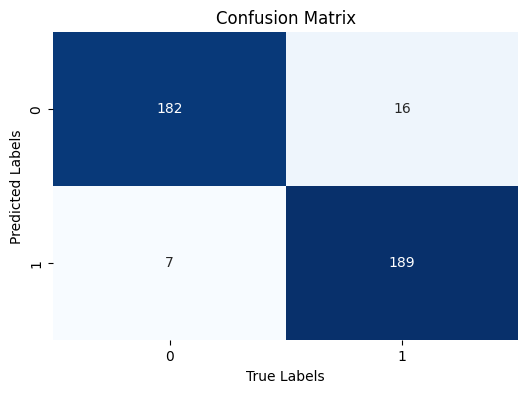

In [52]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_cv, y_pred)

# Heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True Labels')       
plt.ylabel('Predicted Labels')  
plt.title('Confusion Matrix')
plt.show()

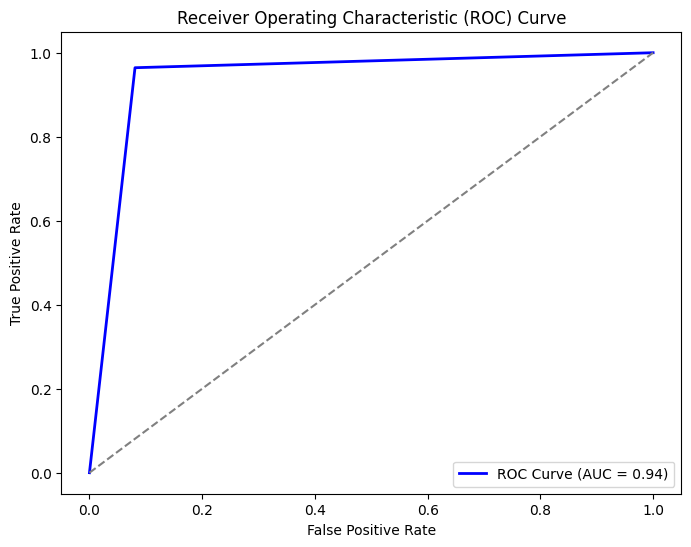

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_cv, y_pred)
roc_auc = roc_auc_score(y_cv, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistic Regression and SVC are obtaining similar results. WE may try out Decsion Tree but the dataset is sparse so it may not be a good idea to use decision trees.

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV


# Initialize the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=43)

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20, 30, 50, 70, 100]}
f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, scoring=f1_scorer, refit=True)
grid_search.fit(X_train_features, y_train)

best_model_dt = grid_search.best_estimator_
y_pred = best_model_dt.predict(X_cv_features)

accuracy = accuracy_score(y_cv, y_pred)
f1 = f1_score(y_cv, y_pred)

# Print accuracy and F1 score
print("Accuracy:", round(accuracy,2))
print("F1 Score:", round(f1,2))
report = classification_report(y_cv, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Classification Report:")
print(report)


Accuracy: 0.87
F1 Score: 0.87
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 70}
Best F1 Score: 0.9143503525499401
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       198
           1       0.88      0.86      0.87       196

    accuracy                           0.87       394
   macro avg       0.87      0.87      0.87       394
weighted avg       0.87      0.87      0.87       394



The F1-score on decsion tree has dropped, let's try Random Forest.

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest model
model_rf = RandomForestClassifier(random_state=43)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 50, 70, 100],
    'min_samples_leaf': [5, 10]
             }

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring=f1_scorer, refit=True)
grid_search.fit(X_train_features, y_train)

best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(X_cv_features)

accuracy = accuracy_score(y_cv, y_pred)
f1 = f1_score(y_cv, y_pred)

# Print accuracy and F1 score
print("Accuracy:", round(accuracy,2))
print("F1 Score:", round(f1,2))
report = classification_report(y_cv, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Classification Report:")
print(report)


Accuracy: 0.92
F1 Score: 0.92
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 5, 'n_estimators': 200}
Best F1 Score: 0.9045096408807568
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       198
           1       0.89      0.95      0.92       196

    accuracy                           0.92       394
   macro avg       0.92      0.92      0.92       394
weighted avg       0.92      0.92      0.92       394



In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Initialize the Naive Bayes model
model_NB = MultinomialNB()

param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}  # The smoothing parameter 'alpha' for MultinomialNB

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=model_NB, param_grid=param_grid, cv=5, scoring=f1_scorer, refit=True)
grid_search.fit(X_train_features, y_train)

best_model_NB = grid_search.best_estimator_
y_pred = best_model_NB.predict(X_cv_features)

accuracy = accuracy_score(y_cv, y_pred)
f1 = f1_score(y_cv, y_pred)

# Print accuracy and F1 score
print("Accuracy:", round(accuracy,2))
print("F1 Score:", round(f1,2))

report = classification_report(y_cv, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Classification Report:")
print(report)


Accuracy: 0.94
F1 Score: 0.94
Best Hyperparameters: {'alpha': 0.1}
Best F1 Score: 0.9355940515283827
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       198
           1       0.93      0.96      0.94       196

    accuracy                           0.94       394
   macro avg       0.94      0.94      0.94       394
weighted avg       0.94      0.94      0.94       394



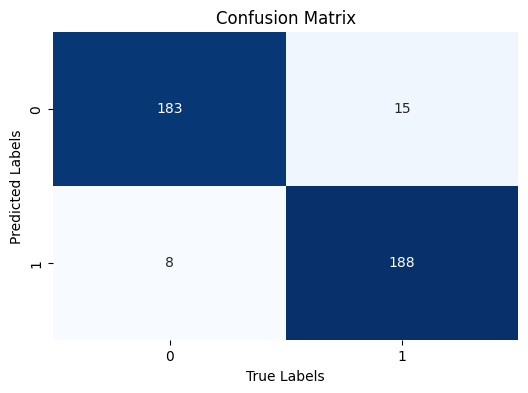

In [60]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_cv, y_pred)

# Heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True Labels')       
plt.ylabel('Predicted Labels')  
plt.title('Confusion Matrix')
plt.show()


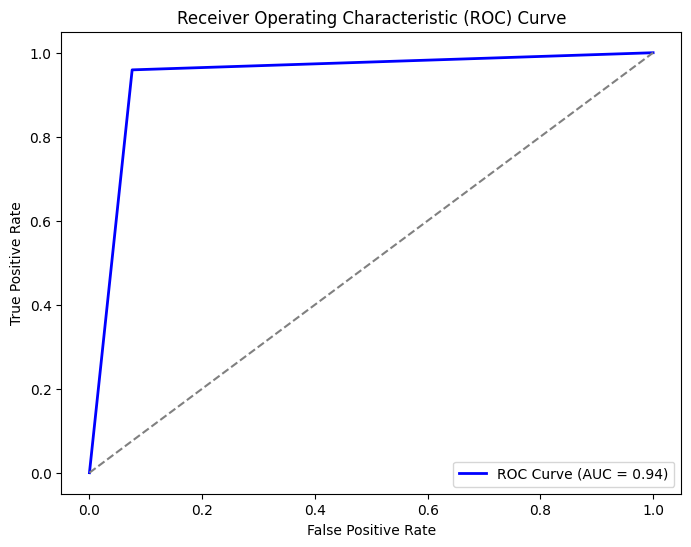

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_cv, y_pred)
roc_auc = roc_auc_score(y_cv, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Initialize individual classifiers
logistic_regression = best_model_lr
svm = best_model_svc
naive_bayes = best_model_NB

# Create a Voting Classifier by combining the individual classifiers
voting_classifier = VotingClassifier(
    estimators=[('lr', logistic_regression), ('svm', svm), ('nb', naive_bayes)],
    voting='hard'  # 'hard' for majority vote, 'soft' for weighted averaging of probabilities
)

# Train the Voting Classifier on the training data
voting_classifier.fit(X_train_features, y_train)

# Make predictions on the cross-validation set
y_pred = voting_classifier.predict(X_cv_features)

accuracy = accuracy_score(y_cv, y_pred)
f1 = f1_score(y_cv, y_pred)

# Print accuracy and F1 score
print("Accuracy:", round(accuracy,2))
print("F1 Score:", round(f1,2))

# Evaluate the Voting Classifier
report = classification_report(y_cv, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.95
F1 Score: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       198
           1       0.94      0.96      0.95       196

    accuracy                           0.95       394
   macro avg       0.95      0.95      0.95       394
weighted avg       0.95      0.95      0.95       394



<span style="color: yellow;"> Obtaining almost same F1-Score and accuracy as Logistic Regression. So we may save Logistic Regression as it will require less space to save the model as pkl file. Before That let's check all the model perofrmance on the test dataset one by one.
</span>

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, f1_score

y_pred = best_model_lr.predict(X_test_features)
report = classification_report(y_test, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Classification Report:")
print(report)

Best Hyperparameters: {'alpha': 0.1}
Best F1 Score: 0.9355940515283827
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       202
           1       0.94      0.93      0.93       192

    accuracy                           0.94       394
   macro avg       0.94      0.94      0.94       394
weighted avg       0.94      0.94      0.94       394



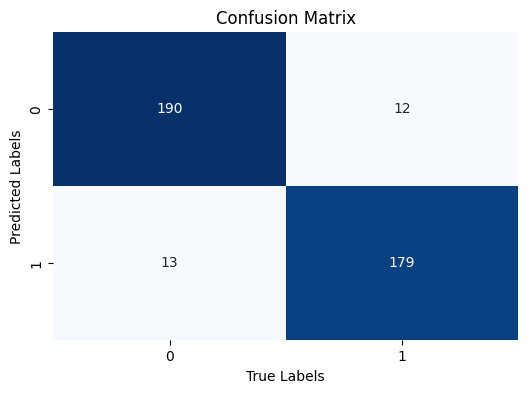

In [64]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True Labels')       
plt.ylabel('Predicted Labels')  
plt.title('Confusion Matrix')
plt.show()

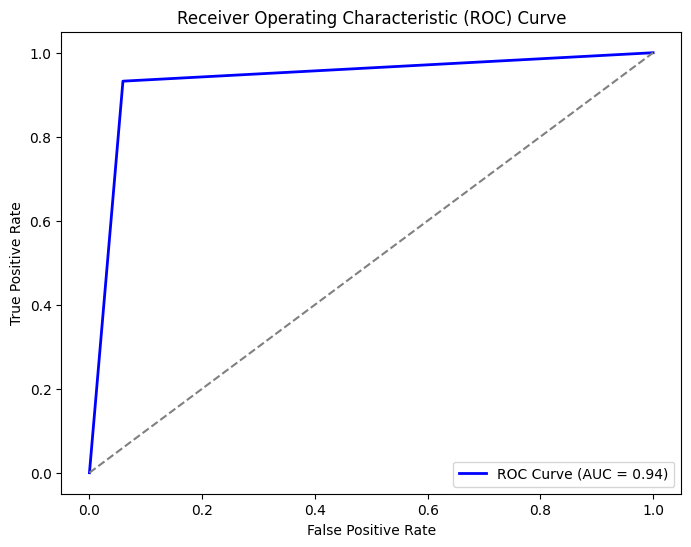

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Best Hyperparameters: {'alpha': 0.1}
Best F1 Score: 0.9355940515283827
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       202
           1       0.93      0.94      0.93       192

    accuracy                           0.93       394
   macro avg       0.93      0.93      0.93       394
weighted avg       0.93      0.93      0.93       394



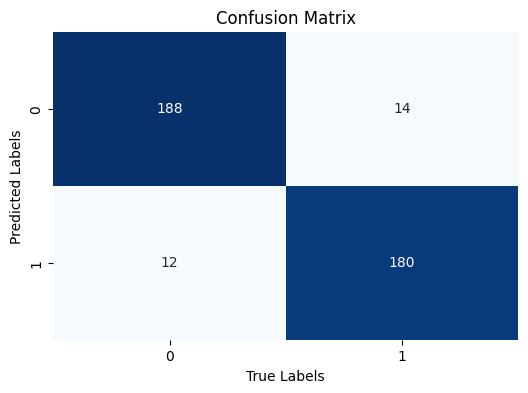

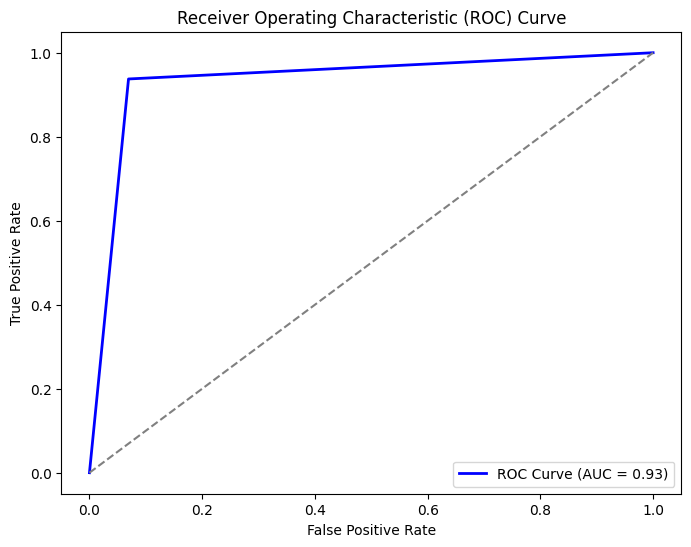

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, make_scorer, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = best_model_svc.predict(X_test_features)
report = classification_report(y_test, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Classification Report:")
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True Labels')       
plt.ylabel('Predicted Labels')  
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Best Hyperparameters: {'alpha': 0.1}
Best F1 Score: 0.9355940515283827
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       202
           1       0.95      0.93      0.94       192

    accuracy                           0.94       394
   macro avg       0.94      0.94      0.94       394
weighted avg       0.94      0.94      0.94       394



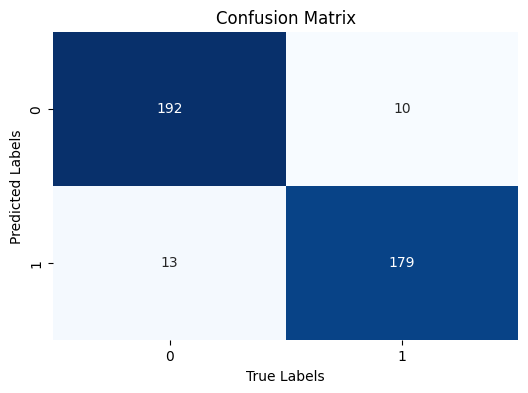

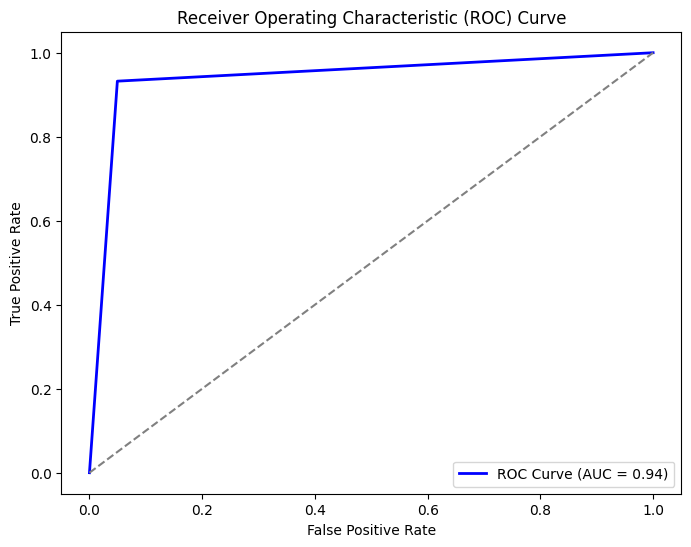

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, make_scorer, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = best_model_NB.predict(X_test_features)
report = classification_report(y_test, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Classification Report:")
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True Labels')       
plt.ylabel('Predicted Labels')  
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<span style="color: yellow;"> Now we will save all the mdoels</span>

In [71]:
import joblib

# Save the best models using Pickle (.pkl)
joblib.dump(best_model_lr, 'best_model_lr.pkl')
joblib.dump(best_model_svc, 'best_model_svc.pkl')
joblib.dump(best_model_NB, 'best_model_NB.pkl')

# Save the best models using Joblib (.joblib)
joblib.dump(best_model_lr, 'best_model_lr.joblib')
joblib.dump(best_model_svc, 'best_model_svc.joblib')
joblib.dump(best_model_NB, 'best_model_NB.joblib')


['best_model_NB.joblib']